# Left-Right symmetric model Lagrangian

In this notebook we study the potential in the reference of [Barenboim1996](https://arxiv.org/abs/hep-ph/9603379v1) in the case of real vev's, as a consequence $\alpha = \theta = 0$. For the tadpoles we also consider $k_2 = k_1$. Also in this notebook we consider the particular case of $v_L = 0$

In [1]:
from sympy import symbols, init_printing, Matrix, I, sqrt, conjugate, trace, factor, simplify
from sympy.physics import msigma 
init_printing()

## Scalars

### Triplets

In [2]:
deltaLp, deltaLpp = symbols(r'\delta_L^+, \delta_L^{++}')
deltaRp, deltaRpp = symbols(r'\delta_R^+, \delta_R^{++}')

deltaL0 = symbols(r'\delta_L^0')
deltaR0 = symbols(r'\delta_R^0') ####### These fields are complex in general

In [3]:
sqrt2 = sqrt(2)
DeltaL = Matrix(
    [
        [deltaLp/sqrt2, deltaLpp],
        [deltaL0, -deltaLp/sqrt2]
    ]
)
DeltaR = Matrix(
    [
        [deltaRp/sqrt2, deltaRpp],
        [deltaR0, -deltaRp/sqrt2]
    ]
)

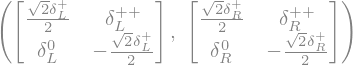

In [4]:
DeltaL, DeltaR

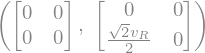

In [5]:
vR, theta = symbols(r'v_R, \theta', positive=True)
vL = 0 ###########
vevL = {deltaL0:vL/sqrt2, deltaLp:0, deltaLpp:0}
vevR = {deltaR0:vR/sqrt2, deltaRp:0, deltaRpp:0}
DeltaL.subs(vevL), DeltaR.subs(vevR)

### Bidoublet

In [6]:
phi1p = symbols(r'\phi_1^+')
phi2p = symbols(r'\phi_2^+')

phi10, phi20 = symbols(r'\phi_1^0, \phi_2^0')

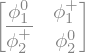

In [7]:
Phi = Matrix(
    [
        [phi10, phi1p],
        [conjugate(phi2p), phi20]
    ]
)
Phi

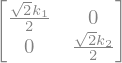

In [8]:
k1, k2 = symbols(r"k_1, k_2", positive=True)
vevPhi = {phi10:k1/sqrt2, phi20:k2/sqrt2, phi1p:0, phi2p:0}
Phi.subs(vevPhi)

## Scalar potential and Higgs mass spectrum

In [9]:
from sympy.physics.quantum import Dagger
from sympy import solve

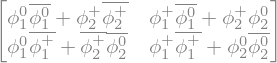

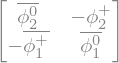

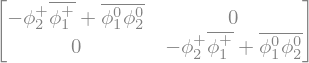

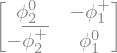

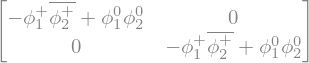

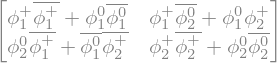

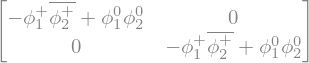

In [10]:
PhiDagger = Dagger(Phi)
#PhiDagger
PhiDaggerPhi = PhiDagger*Phi
display(PhiDaggerPhi)
Phitilde = (msigma(2)*conjugate(Phi)*msigma(2))
#Phitilde
display(Phitilde)
PhitildePhiDagger = Phitilde*PhiDagger
display(PhitildePhiDagger)
PhitildeDagger = Dagger(Phitilde)
#PhitildeDagger
display(PhitildeDagger)
PhitildeDaggerPhi = PhitildeDagger*Phi
display(PhitildeDaggerPhi)
PhiPhiDagger = Phi*PhiDagger
display(PhiPhiDagger)
PhiPhitildeDagger = Phi*PhitildeDagger
display(PhiPhitildeDagger)

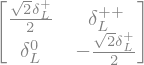

In [11]:
DeltaL

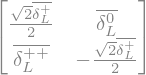

In [12]:
DeltaLDagger = Dagger(DeltaL)
DeltaLDagger

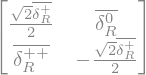

In [13]:
DeltaRDagger = Dagger(DeltaR)
DeltaRDagger

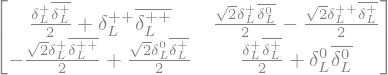

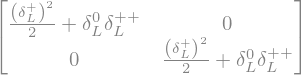

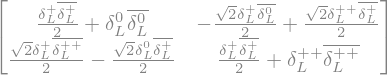

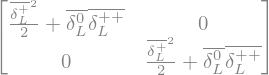

In [14]:
DeltaLDeltaLDagger = DeltaL*DeltaLDagger
display(DeltaLDeltaLDagger)
DeltaLDeltaL = DeltaL*DeltaL
display(DeltaLDeltaL)
DeltaLDaggerDeltaL = DeltaLDagger*DeltaL
display(DeltaLDaggerDeltaL)
DeltaLDaggerDeltaLDagger = DeltaLDagger*DeltaLDagger
display(DeltaLDaggerDeltaLDagger)

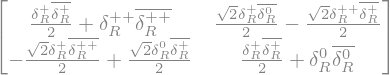

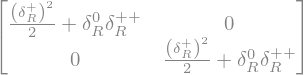

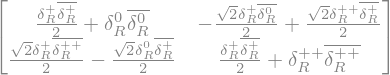

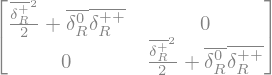

In [15]:
DeltaRDeltaRDagger = DeltaR*DeltaRDagger
display(DeltaRDeltaRDagger)
DeltaRDeltaR = DeltaR*DeltaR
display(DeltaRDeltaR)
DeltaRDaggerDeltaR = DeltaRDagger*DeltaR
display(DeltaRDaggerDeltaR)
DeltaRDaggerDeltaRDagger = DeltaRDagger*DeltaRDagger
display(DeltaRDaggerDeltaRDagger)

### Higgs potential

In [16]:
mu12, mu22, mu32 = symbols(r'\mu_1^2, \mu_2^2, \mu_3^2', real=True)
lamb1, lamb2, lamb3, lamb4 = symbols(r'\lambda_1, \lambda_2, \lambda_3, \lambda_4', real=True)
rho1, rho2, rho3, rho4 = symbols(r'\rho_1, \rho_2, \rho_3, \rho_4', real=True)
alpha1, alpha2, alpha3 = symbols(r'\alpha_1, \alpha_2, \alpha_3', real=True)
beta1, beta2, beta3 = symbols(r'beta_1, beta_2, beta_3', real=True)

In [17]:
VLRPhi = (
    # Vphi
    -mu12*trace(PhiDaggerPhi)
    - mu22*(trace(Phitilde*PhiDagger) + trace(PhitildeDagger*Phi))
    #
    + lamb1*(trace(PhiPhiDagger))**2
    + lamb2*(trace(PhitildePhiDagger)**2 + trace(PhitildeDaggerPhi)**2)
    + lamb3*trace(PhitildePhiDagger)*trace(PhitildeDaggerPhi)
    + lamb4*trace(PhiDaggerPhi)*(trace(PhitildePhiDagger) + trace(PhitildeDaggerPhi))
    # Vtriplet
    -mu32*(trace(DeltaLDeltaLDagger) + trace(DeltaRDeltaRDagger))
    + rho1*(trace(DeltaLDeltaLDagger)**2 + trace(DeltaRDeltaRDagger)**2)
    + rho2*(trace(DeltaLDeltaL)*trace(DeltaLDaggerDeltaLDagger) + trace(DeltaRDeltaR)*trace(DeltaRDaggerDeltaRDagger))
    + rho3*trace(DeltaLDeltaLDagger)*trace(DeltaRDeltaRDagger)
    + rho4*(trace(DeltaLDeltaL)*trace(DeltaRDaggerDeltaRDagger) + trace(DeltaLDaggerDeltaLDagger)*trace(DeltaRDeltaR))
    # Vdoubletriplet
    + alpha1*trace(PhiDaggerPhi)*(trace(DeltaLDeltaLDagger) + trace(DeltaRDeltaRDagger))
    + alpha2*(
        trace(PhitildeDaggerPhi)*trace(DeltaRDeltaRDagger) + trace(PhitildePhiDagger)*trace(DeltaLDeltaLDagger) + 
        trace(PhitildePhiDagger)*trace(DeltaRDeltaRDagger) + trace(PhitildeDaggerPhi)*trace(DeltaLDeltaLDagger) # this term is different to Barenboim1996, because there is an error in the hermitian conjugate  the proportional terms to DeltaLDeltaLDagger
    )
    # + alpha3*(trace(PhiPhiDagger*DeltaLDeltaLDagger) + trace(PhiDaggerPhi*DeltaRDeltaRDagger))
    + beta1*(trace(Phi*DeltaR*PhiDagger*DeltaLDagger) + trace(PhiDagger*DeltaL*Phi*DeltaRDagger))
    + beta2*(trace(Phitilde*DeltaR*PhiDagger*DeltaLDagger) + trace(PhitildeDagger*DeltaL*Phi*DeltaRDagger))
    # beta3 = beta2 in this case
    + beta2*(trace(Phi*DeltaR*PhitildeDagger*DeltaLDagger) + trace(PhiDagger*DeltaL*Phitilde*DeltaRDagger))
)
#VLRPhi.subs(vevL).subs(vevR).subs(vevPhi)

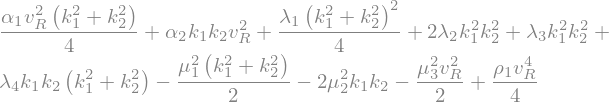

In [18]:
VLRPhi_vev = VLRPhi.subs(vevL).subs(vevR).subs(vevPhi).simplify()#.collect([mu12, mu22, mu32, lamb2, rho1, beta2], factor)#.subs(k1ri)
VLRPhi_vev

Calculation of the tadpole condition. In this case we only have three conditions because the vev are real.

In [19]:
scalar_vevs = [k1, k2, vR]
tadpoles_relations = {}
for vev in scalar_vevs:
    tadpoles_relations[vev] = VLRPhi_vev.diff(vev).expand().collect(
    [alpha1, alpha2, lamb1, lamb2, lamb3, lamb4, beta1, beta2], factor)

## Caso $k_2=k_1$

In [20]:
from sympy import trigsimp

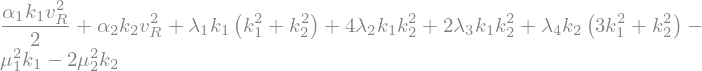

In [21]:
tadpole1_caso1 = tadpoles_relations[k1].trigsimp()
tadpole1_caso1

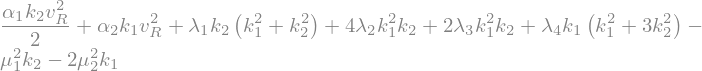

In [22]:
tadpole2_caso1 = tadpoles_relations[k2].trigsimp()
tadpole2_caso1

In [23]:
tadpole12_sol_caso1 = solve([tadpole1_caso1, tadpole2_caso1], [mu12, mu22], dict=True)[0]

In [24]:
for vev in tadpole12_sol_caso1:
    tadpole12_sol_caso1[vev] = tadpole12_sol_caso1[vev].collect([k1, alpha1, alpha2],  trigsimp)

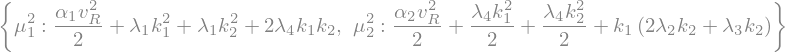

In [25]:
tadpole12_sol_caso1

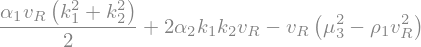

In [26]:
tadpole3_caso1 = tadpoles_relations[vR].trigsimp()
tadpole3_caso1

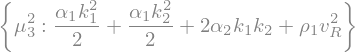

In [27]:
mu32_sol = solve(tadpole3_caso1, mu32, dict=True)[0]
mu32_sol

## Mass matrices

Expand neutral fields in terms of real and imaginary parts
$$F = \frac{1}{\sqrt{2}}(F^r + i F^i)$$

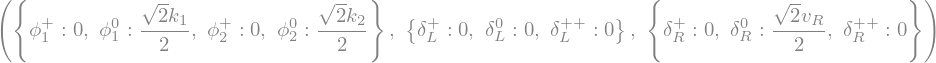

In [28]:
vevPhi, vevL, vevR

In [29]:
phi10r, phi10i = symbols(r'\phi_1^{0r}, \phi_1^{0i}', real=True)
phi20r, phi20i = symbols(r'\phi_2^{0r}, \phi_2^{0i}', real=True)
deltaR0r, deltaR0i = symbols(r'\delta_R^{0r}, \delta_R^{0i}', real=True)
deltaL0r, deltaL0i = symbols(r'\delta_L^{0r}, \delta_L^{0i}', real=True)
complex_scalar_fields = {
    phi10: (k1 + phi10r + I*phi10i)/sqrt2,
    phi20: (k2 + phi20r + I*phi20i)/sqrt2,
    deltaR0: (vR + deltaR0r + I*deltaR0i)/sqrt2,
    deltaL0: (vL + deltaL0r + I*deltaL0i)/sqrt2
}

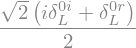

In [30]:
complex_scalar_fields[deltaL0]

In [31]:
VLRPhi_ri = VLRPhi.subs(complex_scalar_fields)

# Scalar ms

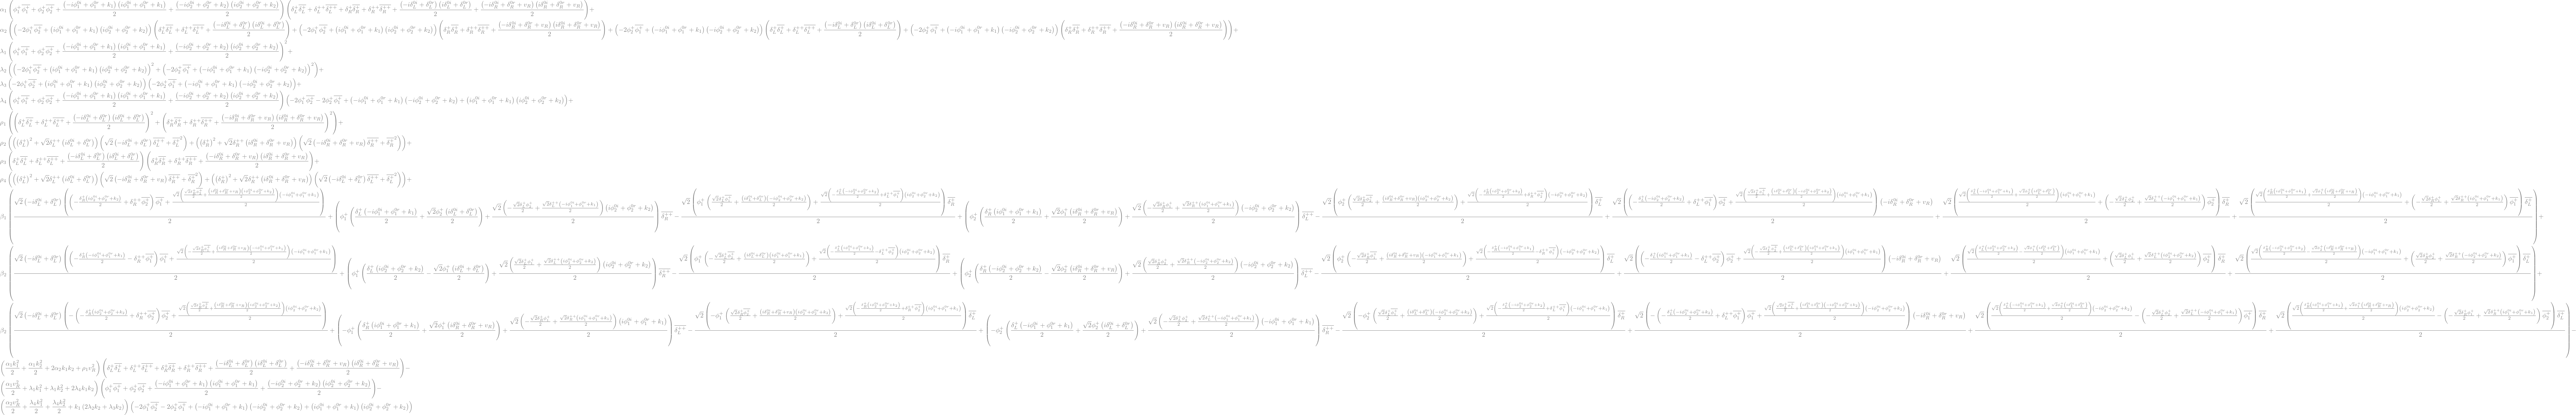

In [32]:
VLRPhi_ri_tadpole_caso1 = VLRPhi_ri.subs(tadpole12_sol_caso1).subs(mu32_sol)
VLRPhi_ri_tadpole_caso1

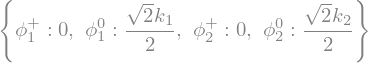

In [33]:
vevPhi

In [34]:
vevPhi[phi10r] = 0#vevPhi[phi10]
vevPhi[phi10i] = 0
vevPhi[phi20r] = 0#vevPhi[phi20]
vevPhi[phi20i] = 0

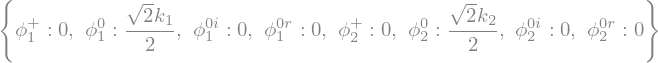

In [35]:
vevPhi

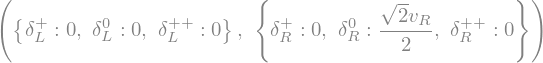

In [36]:
vevL,vevR

In [37]:
vevL[deltaL0r] = 0#vevL[deltaL0]
vevL[deltaL0i] = 0
vevR[deltaR0r] = 0#vevR[deltaR0]
vevR[deltaR0i] = 0

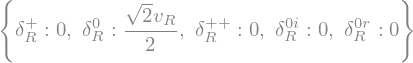

In [38]:
vevR

In [39]:
from sympy import derive_by_array

In [40]:
def build_mass_matrix(potential, fields1, fields2):
    """
    Build the mass matrix for a given potential and fields.
    """
    # Initialize the mass matrix
    Matrix_elements = derive_by_array(derive_by_array(potential, fields1), fields2)

    return Matrix_elements.tomatrix()

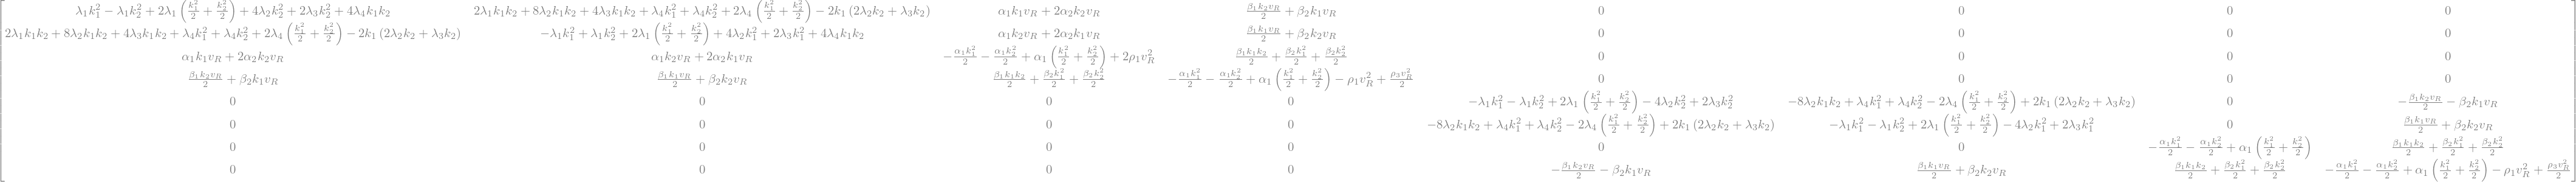

In [41]:
phir_fields = [phi10r, phi20r, deltaR0r, deltaL0r]
phii_fields = [phi10i, phi20i, deltaR0i, deltaL0i]
phiri_fields = phir_fields + phii_fields

MRI_square = (build_mass_matrix(VLRPhi_ri_tadpole_caso1, phiri_fields, phiri_fields)).subs(
    vevPhi
).subs(vevL).subs(vevR)
MRI_square

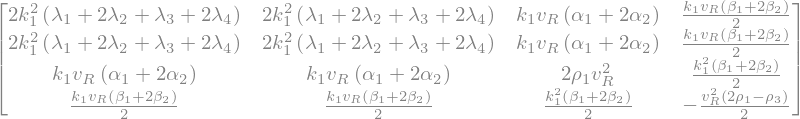

In [42]:
Mrr = MRI_square[0:4, 0:4].applyfunc(lambda x: x.expand().trigsimp().subs(k2, k1).collect([k1, vR], lambda x:x.collect([vR],factor)))
Mrr

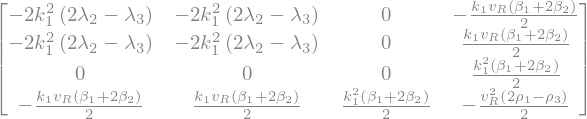

In [43]:
Mii = MRI_square[4:8, 4:8].applyfunc(
    lambda x: x.expand().trigsimp().subs(k2, k1).collect([k1, vR], lambda x:x.collect([vR],factor))
)
Mii

In [44]:
Mii.rank()

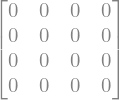

In [45]:
Mri = MRI_square[0:4, 4:8]
Mri

In [46]:
from sympy import Dummy

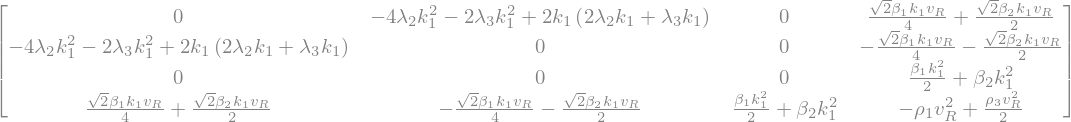

In [47]:
phip_fields = [phi1p, phi2p, deltaRp, deltaLp]

dummyconjugate1p = Dummy(r'\phi_1^{+,d}')
dummyconjugate2p = Dummy(r'\phi_2^{+,d}')
dummyconjugateRp = Dummy(r'\delta_R^{+,d}')
dummyconjugateLp = Dummy(r'\delta_L^{+,d}')

dummychangep = {
    conjugate(phi1p):dummyconjugate1p,
    conjugate(phi2p):dummyconjugate2p,
    conjugate(deltaRp):dummyconjugateRp,
    conjugate(deltaLp):dummyconjugateLp
}
phim_fields = [dummyconjugate1p, dummyconjugate2p, dummyconjugateRp, dummyconjugateLp] #list(dummychangep.values())
Mp_square = (derive_by_array(derive_by_array(VLRPhi_ri_tadpole_caso1.subs(dummychangep), phim_fields), phip_fields)).subs(
    {value:key for key, value in dummychangep.items()}
).subs(
    vevPhi
).subs(vevL).subs(vevR).subs(k2, k1)
Mp_square

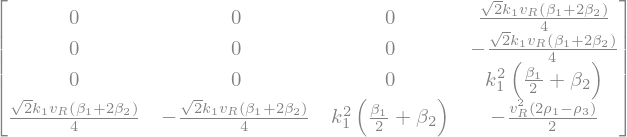

In [48]:
Mp_square.applyfunc(lambda x:x.collect(k1, lambda x:x.factor().collect([vR])))

In [49]:
Mp_square.rank()

# Calculating the mass matrices of the scalars

The following two functions allows us calculate the mass matrices

## Mass doubly charged scalars

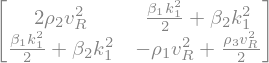

In [50]:
phipp_fields = [deltaRpp, deltaLpp]
dummyconjugateRpp = Dummy('deltaRpp')
dummyconjugateLpp = Dummy('deltaLpp')
dummychangepp = {
    conjugate(deltaRpp):dummyconjugateRpp,
    conjugate(deltaLpp):dummyconjugateLpp
}
phippc_fields = list(dummychangepp.values())#[deltaRmm, deltaLmm]
display(phippc_fields)
Mpp_square = (
    build_mass_matrix(VLRPhi_ri_tadpole_caso1.subs(dummychangepp), fields1=phippc_fields, fields2=phipp_fields)
).subs(
    vevPhi
).subs(vevPhi).subs(vevL).subs(vevR).subs(k2, k1)
Mpp_square

In [51]:
Mpp_square.rank()

In [52]:
Ppp, Dpp = Mpp_square.diagonalize()

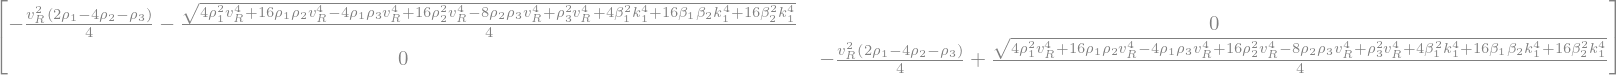

In [53]:
Dpp

In [54]:
b12 = symbols('b_{12}', real=True)

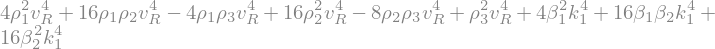

In [55]:
terminsqrt = (Dpp[0,0] - Dpp[1,1]).simplify().args[1].args[0]
terminsqrt

In [56]:
terminsqrt_approx = terminsqrt.collect([k1], lambda x:x.factor().collect([vR], factor))
terminsqrt_approx

In [57]:
Dpp[0,0] = Dpp[0,0].subs(
        terminsqrt,
        terminsqrt_approx
    ).collect([-k1**2])#.subs(beta1 + 2*beta2, b12)

Dpp[1,1] = Dpp[1,1].subs(
        terminsqrt,
        terminsqrt_approx
    ).collect([-k1**2])#.subs(beta1 + 2*beta2, b12)

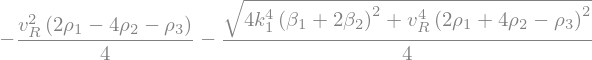

In [58]:
Dpp[0,0]

In [59]:
mH1pp = symbols('m_{H_1^{++}}', positive=True)
mH2pp = symbols('m_{H_2^{++}}', positive=True)

In [60]:
from sympy import Eq

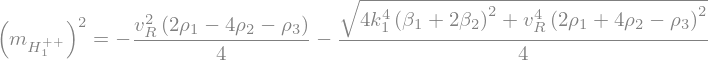

In [61]:
eq1 = Eq(mH1pp**2, Dpp[0,0])
eq1

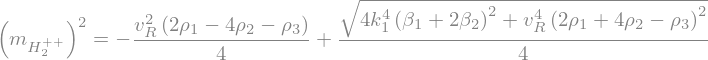

In [62]:
eq2 = Eq(mH2pp**2, Dpp[1,1])
eq2

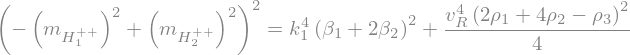

In [63]:
eqminus = Eq((eq2.lhs - eq1.lhs)**2, (eq2.rhs - eq1.rhs)**2 )
eqminus

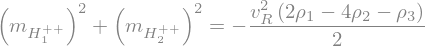

In [64]:
eqplus = Eq((eq2.lhs + eq1.lhs), (eq2.rhs + eq1.rhs) )
eqplus

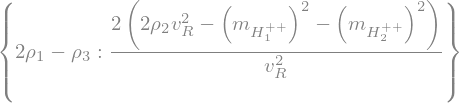

In [65]:
rho12_sol  = solve(eqplus, 2*rho1 - rho3, dict=True)[0]
rho12_sol

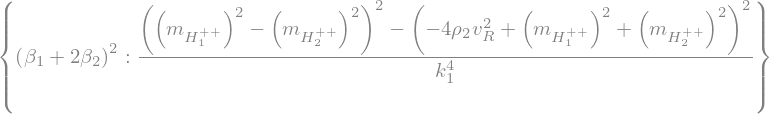

In [66]:
beta12_sol = solve(eqminus.subs(rho12_sol).simplify(), [(beta1 + 2*beta2)**2], dict=True)[0] 
beta12_sol

## Mass singly charged scalars

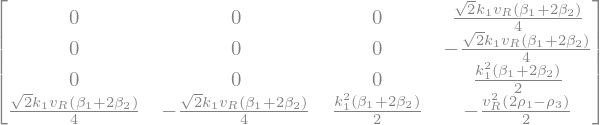

In [67]:
Mp_square.applyfunc(factor)

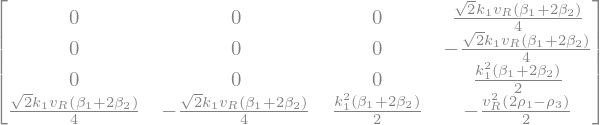

In [68]:
Mp_square.applyfunc(factor)

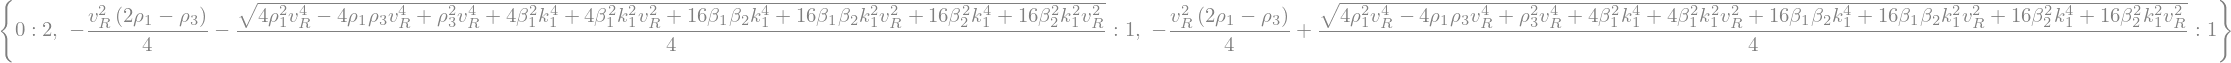

In [69]:
Mp_eigenvals_dict = Mp_square.applyfunc(factor).tomatrix().eigenvals()
Mp_eigenvals_dict

In [70]:
Pp, Dp = Mp_square.applyfunc(factor).tomatrix().diagonalize()

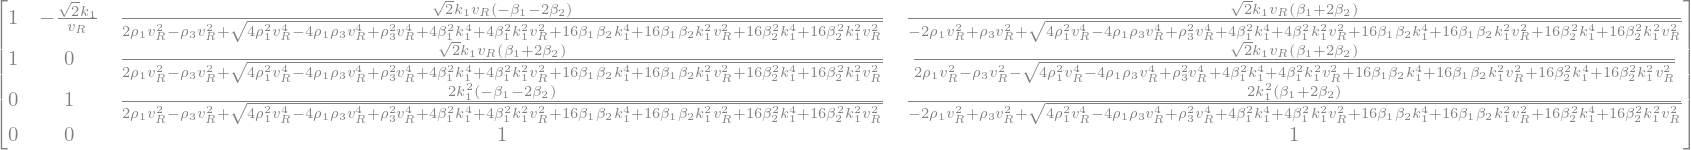

In [71]:
Pp

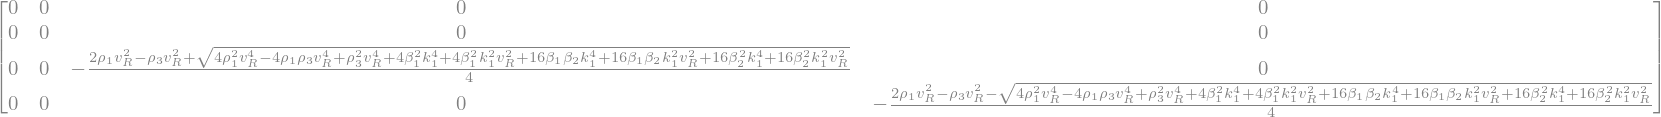

In [72]:
Dp = Dp.applyfunc(factor)
Dp

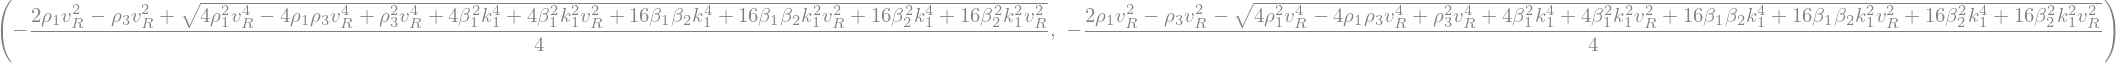

In [73]:
mH1p_exp, mH2p_exp = Dp[2,2], Dp[3,3]
mH1p_exp, mH2p_exp

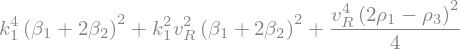

In [74]:
((-mH1p_exp + mH2p_exp).simplify()**2).collect(k1, factor)

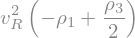

In [75]:
(mH1p_exp + mH2p_exp).simplify()

In [76]:
mH1p, mH2p = symbols('m_{H_1^+}, m_{H_2^+}', positive=True)

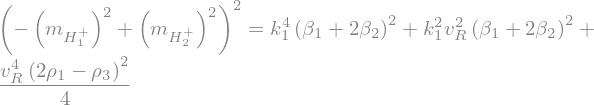

In [77]:
eq1p = Eq((mH2p**2 - mH1p**2)**2, ((mH2p_exp - mH1p_exp).simplify()**2).collect(k1, factor)) #Eq(mH1p**2, mH1p_exp.factor())
eq1p

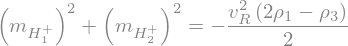

In [78]:
eq2p = Eq((mH1p**2 + mH2p**2), (mH1p_exp + mH2p_exp).simplify().collect(vR, factor)) #Eq(mH2p**2, mH2p_exp.factor())
eq2p

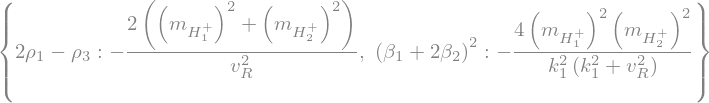

In [79]:
beta12_rho12_sol = solve([eq1p, eq2p], [2*rho1 - rho3, (beta1 + 2*beta2)**2], dict=True)[0]
beta12_rho12_sol

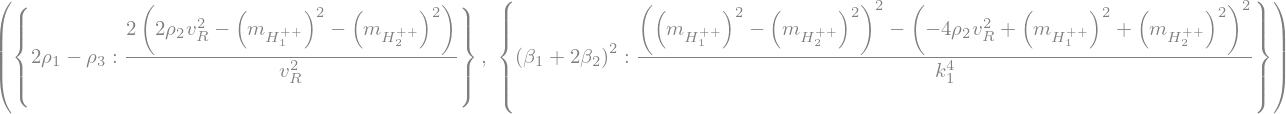

In [80]:
rho12_sol, beta12_sol

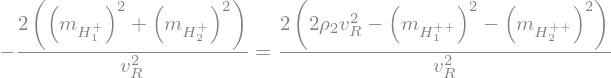

In [81]:
eqrho2 = Eq(beta12_rho12_sol[2*rho1 - rho3], rho12_sol[2*rho1 - rho3])
eqrho2

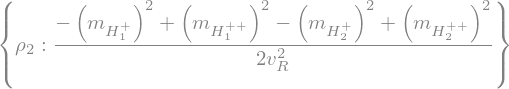

In [82]:
rho2_sol = solve(eqrho2, rho2, dict=True)[0]
rho2_sol

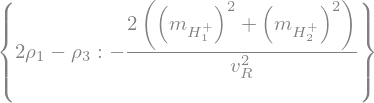

In [83]:
rho12_sol[2*rho1 - rho3] = rho12_sol[2*rho1 - rho3].subs(rho2_sol).factor()

rho12_sol

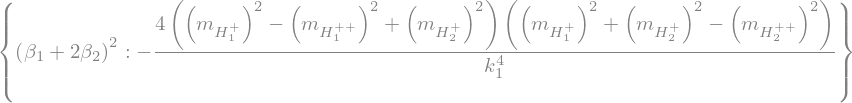

In [84]:
beta12_sol[(beta1 + 2*beta2)**2] = beta12_sol[(beta1 + 2*beta2)**2].subs(rho2_sol).factor()

beta12_sol

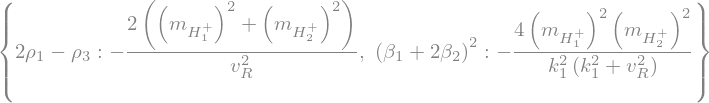

In [85]:
beta12_rho12_sol

In [86]:
mH1pp_square_sol = solve(
    Eq(beta12_rho12_sol[(beta1 + 2*beta2)**2], beta12_sol[(beta1 + 2*beta2)**2]), mH1pp**2, dict=True
)[0]
mH1pp_square_sol[mH1pp**2] = mH1pp_square_sol[mH1pp**2].expand().collect(k1, factor)

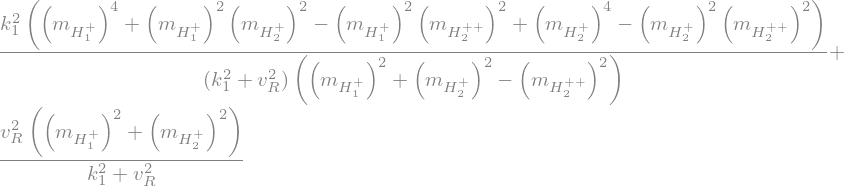

In [87]:
mH1pp_square_sol[mH1pp**2]

## Mass neutral scalars

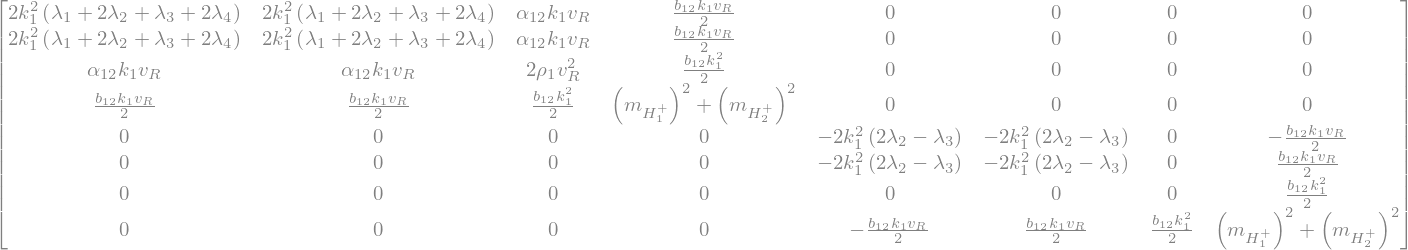

In [88]:
alpha12 = symbols(r'\alpha_{12}', real=True)
MRI_square_simplify = MRI_square.subs(k2, k1).applyfunc(factor).subs(rho12_sol).subs(beta1 + 2*beta2,b12).subs(alpha1 + 2*alpha2,alpha12)
MRI_square_simplify

In [ ]:
# PRI, DRI = MRI_square_simplify.diagonalize()

## Cp odd

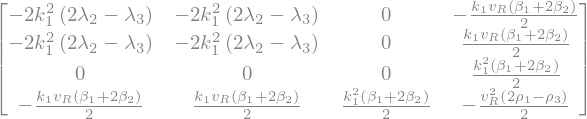

In [89]:
Mii.applyfunc(lambda x:x.collect(k1, factor).collect([vL, vR], factor))

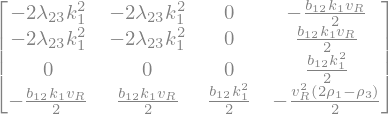

In [90]:
lamb23 = symbols(r'\lambda_{23}', real=True)
lambda_beta_changes = {
    2*lamb2 - lamb3 :lamb23,
    beta1 + 2*beta2:b12
}
Mii_simplify = Mii.applyfunc(lambda x:x.collect(k1, factor).collect([vL, vR], factor)).subs(lambda_beta_changes)
Mii_simplify

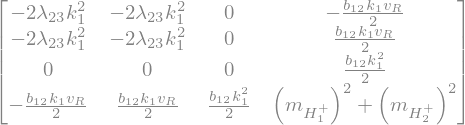

In [91]:
Mii_simplify2 = Mii_simplify.subs(rho12_sol)
Mii_simplify2

In [92]:
Pii, Dii = Mii_simplify2.diagonalize()

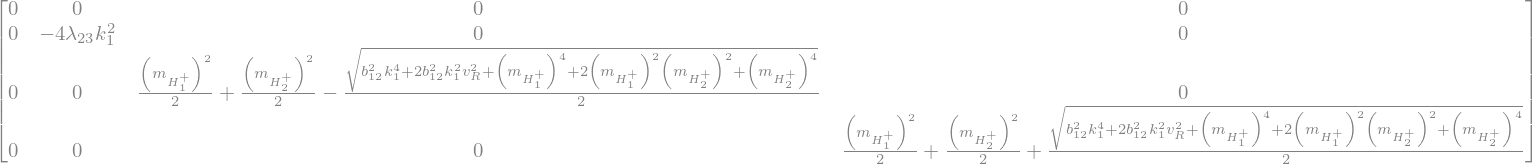

In [93]:
Dii

In [94]:
lamb23_sol = {lamb23:0}
lamb23_sol

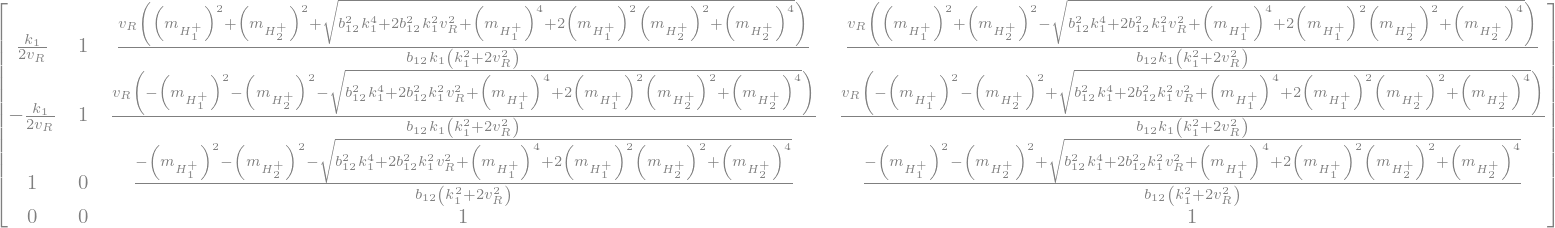

In [95]:
Pii

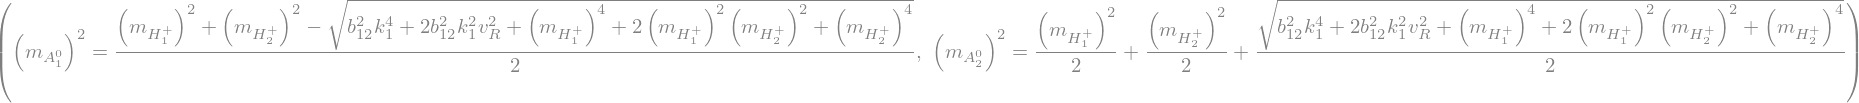

In [96]:
mA1 = symbols('m_{A_1^0}', positive=True)
mA2 = symbols('m_{A_2^0}', positive=True)
eq1ii = Eq(mA1**2, Dii[2,2].factor())
eq2ii = Eq(mA2**2, Dii[3,3])
eq1ii, eq2ii

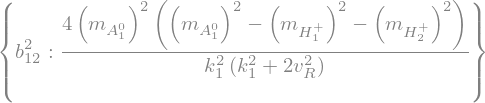

In [97]:
b12_square_sol1 = solve(eq1ii, b12**2, dict=True)[0]
b12_square_sol1

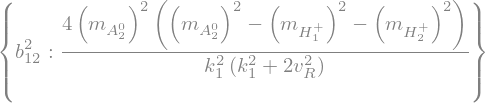

In [98]:
b12_square_sol2 = solve(eq2ii, b12**2, dict=True)[0]
b12_square_sol2

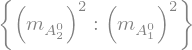

In [99]:
mA2_sol = solve(Eq(b12_square_sol1[b12**2], b12_square_sol2[b12**2]), mA2**2, dict=True)[0]
mA2_sol

## CP even

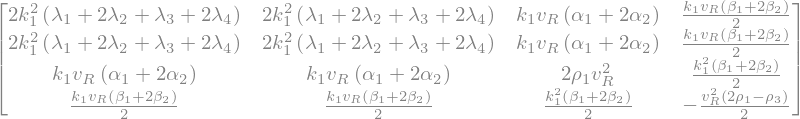

In [100]:
Mrr.applyfunc(lambda x:x.collect(k1, factor).collect([vR], factor))

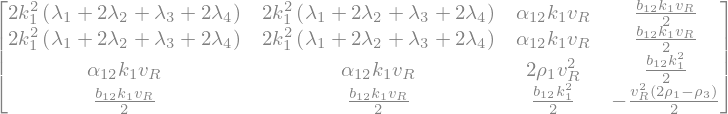

In [104]:
alpha12 = symbols(r'\alpha_{12}', real=True)
lambda_beta_changes = {
    alpha1 + 2*alpha2: alpha12,
    beta1 + 2*beta2:b12
}
Mrr_simplify = Mrr.applyfunc(lambda x:x.collect(k1, factor).collect([vL, vR], factor)).subs(lambda_beta_changes)
Mrr_simplify


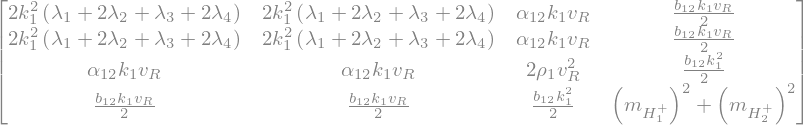

In [105]:
Mrr_simplify2 = Mrr_simplify.subs(rho12_sol).applyfunc(simplify)
Mrr_simplify2

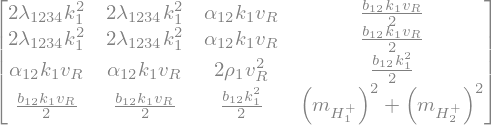

In [106]:
lamb1234 = symbols(r'\lambda_{1234}', real=True)
lambda_changes = {lamb1 + 2*lamb2 + lamb3 + 2*lamb4: lamb1234}
Mrr_simplify3 = Mrr_simplify2.subs(lambda_changes)
Mrr_simplify3

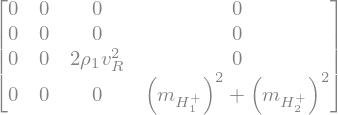

In [126]:
Mrr_simplify3.replace(k1, 0)

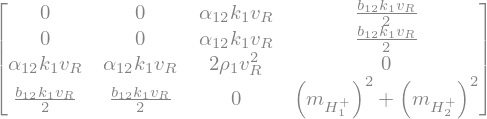

In [129]:
r = symbols('r')
Mrr_simplify3.applyfunc(lambda x:x.subs(k1, r*vR).series(x=r, x0=0, n=2).removeO().subs(r, k1/vR))

In [189]:
#def charpoly_coeffs_approximate(M, x, simplification= lambda x:x):
#    """
#    Approximate the coefficients of the characteristic polynomial of a matrix M
#    keeping only the terms with large degree on vR
#    """
#    charpoly = M.charpoly()
#    coeffs = charpoly.coeffs()
#    for i in range(len(coeffs)):
#        coeffs[i] = simplification(coeffs[i].series(x=x, x0=0, n=2).removeO())
#    return coeffs

#def construct_poly(coeffs_list, x):
#    """
#    Construct a polynomial from a list of coefficients
#    """
#    poly = 0
#    power = len(coeffs_list)
#    for i in range(power):
#        poly += coeffs_list[i] * x**(power-1 - i)
#    return poly

In [190]:
#charpoly_coeffs_approximate(
#    Mrr_simplify3, k1, simplification=lambda x:x.subs(
#        b12**2, beta12_rho12_sol[(beta1 + 2*beta2)**2]
#    )
#)

In [191]:
#Mrr_charpoly_approx = Mrr_simplify3.applyfunc(lambda x:x.series(x=k1, x0=0, n=2).removeO()).charpoly().subs(
#    b12**2, beta12_rho12_sol[(beta1 + 2*beta2)**2]
#).series(x=k1, x0=0, n=2).removeO()
#Mrr_charpoly_approx

In [193]:
from sympy import eye

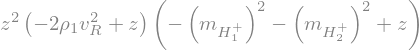

In [197]:
z = symbols('z')
charpoly_Mrr = (
    Mrr_simplify3.applyfunc(lambda x:x.series(x=k1, x0=0, n=2).removeO()) - eye(4)*z
).det().collect(z).series(x=k1, x0=0, n=2).removeO()
#charpoly_Mrr = Poly(charpoly_Mrr, z)
charpoly_Mrr.factor()

In [196]:
#charpoly_Mrr = (
#    Mrr_simplify3 - eye(4)*z
#).det().collect(z)
#charpoly_Mrr = Poly(charpoly_Mrr, z)
#charpoly_Mrr.collect(z, lambda x:x.collect(k1, factor))

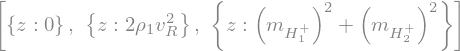

In [198]:
mHi_sol = solve(charpoly_Mrr, z, dict=True)
mHi_sol

In [199]:
mH1, mH2, mH3, mH4 = symbols('m_{H_1}, m_{H_2}, m_{H_3}, m_{H_4}', positive=True)

In [200]:
eq3rr = Eq(mH3**2, mHi_sol[1][z])
eq4rr = Eq(mH4**2, mHi_sol[2][z])

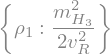

In [202]:
rho1_sol = solve([eq3rr], [rho1], dict=True)[0]
rho1_sol

# Yukawa charged lepton sector

In [418]:
from sympy import IndexedBase, Idx

In [419]:
#Indexed?

In [420]:
i,j = symbols('i, j', cls=Idx)
#h = IndexedBase('h')
#ht = IndexedBase(r'\tilde{h}')
hij = symbols('h_{ij}')
htij = symbols(r'\tilde{h}_{ij}')

In [421]:
#ht[i, j]

In [422]:
nueL, numuL, nutauL = symbols(r'{{\nu_{L}}}_e, {{\nu_{L}}}_\mu, {{\nu_{L}}}_\tau')
nueR, numuR, nutauR = symbols(r'{{\nu_{R}}}_e, {{\nu_{R}}}_\mu, {{\nu_{R}}}_\tau')
nuL = IndexedBase(r'{{\nu_{L}}}')
nuR = IndexedBase(r'{{\nu_{R}}}')
eL, muL, tauL = symbols(r'e_L, \mu_L, \tau_L')
eR, muR, tauR = symbols(r'e_R, \mu_R, \tau_R')
lL = IndexedBase('{{l_L}}')
lR = IndexedBase('{{l_R}}')

In [ ]:
nueL, nuL[i]

In [ ]:
LLi = Matrix(
    [
        [nuL[i]],
        [lL[i]]
    ]
)
LRj = Matrix(
    [
        [nuR[j]],
        [lR[j]]
    ]
)
Dagger(LLi), LRj

⎛⎡______________  __________⎤  ⎡{{\nu_{R}}}[j]⎤⎞
⎜⎣{{\nu_{L}}}[i]  {{l_L}}[i]⎦, ⎢              ⎥⎟
⎝                              ⎣  {{l_R}}[j]  ⎦⎠

In [ ]:
Phitilde

⎡\phi⁰₂   -\phi⁻₂⎤
⎢                ⎥
⎣-\phi⁺₁  \phi⁰₁ ⎦

In [ ]:
LY = (Dagger(LLi)*(hij*Phi + htij*Phitilde)*LRj)[0].subs(vevPhi)

In [ ]:
LY

Charged lepton mass

In [ ]:
Ml = LY.args[0].args[0]
Ml

Dirac neutrino mass

In [ ]:
MnuD = LY.args[1].args[0]
MnuD

As we know, the scale of mass of charged leptons is greater than neutrino mass scale. Thus, we assume $k >> k_1$ and $h_{ij} >> \tilde{h}_{ij}$. In this aproximation

In [ ]:
Ml = k*hij
Ml